# Predicting Term Deposit Subscription by a Client

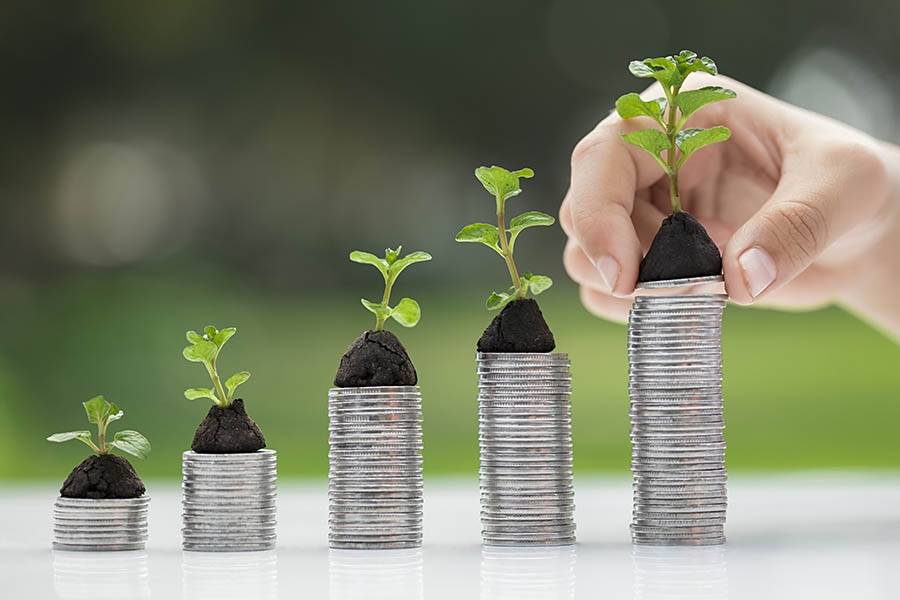

### Problem Statement:
Predict if a customer subscribes to a term deposit or not, when contacted by a 
marketing agent, by understanding the different features and performing predictive 
analytics 

In [150]:
# Import all libraries using pyforest
import pyforest
pd.set_option('display.max_columns',None)

<IPython.core.display.Javascript object>

##### Import Data

In [151]:
# Read the data
fd=pd.read_csv(r'C:\Users\91703\Downloads\svmfile.csv')
fd.head()

<IPython.core.display.Javascript object>

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

#### Exploratory Data Analysis

In [152]:
# Rows and columns in dataframe
fd.shape

(41188, 21)

In [153]:
# Check Nulls present
fd.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [154]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Uni-Varient Analysis

In [86]:
fd.y.iplot(kind='hist',color='yellow',title='Term Deposit Approve',yTitle='Count',xTitle='Intervals')
# Here we can observe that Most of people had not taken loan

In [75]:
fd.loan.iplot(kind='hist',color='green',title='loan',yTitle='Count',xTitle='Intervals')
# Here we can observe that Most of people had not taken loan

In [77]:
fd.job.iplot(kind='hist',color='orange',title='job',yTitle='Count',xTitle='Intervals')
# here we can observe that mostly job is in 1. Admistration 2. Blue Coller 3. Technician

In [81]:
fd['emp.var.rate'].iplot(kind='hist',color='blue',title='emp.var.rate',yTitle='Count',xTitle='Intervals')
# Highest Employees Variation Rate Quatarly is 1.4 and -1.8

In [82]:
fd['education'].iplot(kind='hist',color='purple',title='education',yTitle='Count',xTitle='Intervals')
# Mostly people are collage passout with Degree and secondly High school 

In [3]:
fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [155]:
# Make a copy for further analysis
fd1=fd.copy()

In [156]:
# Replace Categorical values with Numbers based on Importance 
fd['education']=fd['education'].replace({'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,
                                        'professional.course':5,'university.degree':6,'unknown':0})
fd['loan']=fd['loan'].replace({'yes':1,'no':2,'unknown':3})
fd['housing']=fd['housing'].replace({'yes':1,'no':2,'unknown':3})
fd['poutcome']=fd['poutcome'].replace({'success':1,'failure':2,'nonexistent':0})
fd['y']=fd['y'].replace({'yes':1,'no':2})

In [157]:
# Separate Categorical type columns 
cat=[i for i in fd.columns if fd[i].dtype=="O"]
cat

['job', 'marital', 'default', 'contact', 'month', 'day_of_week']

In [158]:
# Separate all Numerical Columns
ca=[i for i in fd.columns if fd[i].dtype!="O"]
print(ca,end='')

['age', 'education', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

In [159]:
# Checking Categorical Value counts
for i in cat:
    print(i)
    print(fd[i].value_counts(dropna=False))
    print()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

contact
cellular     26144
telephone    15044
Name: contact, dtype: int64

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64



In [160]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()  # Object of Label Encoder

In [161]:
# Fit and Trasform Target variable in Numeric format
fd['y']=le.fit_transform(fd['y'])
fd['y'].value_counts()

1    36548
0     4640
Name: y, dtype: int64

In [162]:
# Transform all categorical Variables into Numerical Format
for i in cat:
    fd[i]=le.fit_transform(fd[i])

In [163]:
# Non important Columns are droped
fd=fd.drop(columns=['month', 'day_of_week'],axis=1)

In [164]:
# Verify all Variables are in numerical format
fd.head()

age  job  marital  education  default  housing  loan  contact  duration  \
0   56    3        1          1        0        2     2        1       261   
1   57    7        1          4        1        2     2        1       149   
2   37    7        1          4        0        1     2        1       226   
3   40    0        1          2        0        2     2        1       151   
4   56    7        1          4        0        2     1        1       307   

   campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0         0           1.1          93.994   
1         1    999         0         0           1.1          93.994   
2         1    999         0         0           1.1          93.994   
3         1    999         0         0           1.1          93.994   
4         1    999         0         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  
0          -36.4      4.857       5191.0  1  
1          -36.4      4.857       5191.0  1  
2          -36.4      4.857       5191.0  1  
3          -36.4      4.857       5191.0  1  
4          -36.4      4.857       5191.0  1

In [165]:
# Train Test Split for Model Validation
from sklearn.model_selection import train_test_split
fd_train , fd_test = train_test_split(fd, test_size = .2)

In [166]:
# last column is Target Variable
fd_train_x = fd_train.iloc[:, 0:-1]
fd_train_y= fd_train.iloc[:,-1]

fd_test_x = fd_test.iloc[:, 0:-1]
fd_test_y= fd_test.iloc[:,-1]

In [167]:
# Importing all Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [168]:
# User define function to create Results for Confusion Matrix
def metrics(pred,Model):
    con_mat=confusion_matrix(pred,fd_test_y)
    # This is Direct method
    print("This is Confusion Matrix",)
    print(con_mat)

    fp=con_mat[1][0]
    fn=con_mat[0][1]
    tp=con_mat[1][1]
    tn=con_mat[0][0]

    Acc=(tp+tn)/(fp+fn+tp+tn)
    FPR=(fp/(fp+tn))
    TPR=(tp/(tp+fn))
    Precision=(tp/(tp+fp))
    Recall=TPR
    f1_score=(2*Precision*Recall/(Precision+Recall))
    global df1
    df1=pd.DataFrame({Model:[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
             index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
    return df1

#### 1. Logistic Regression

In [169]:
# Create Object of Logistic Regression
log=LogisticRegression()

In [170]:
log.fit(fd_train_x,fd_train_y)

D:\Installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [171]:
pred=log.predict(fd_test_x)

In [172]:
Logistic_Regression =metrics(pred,'Logistic Regression')
metrics(pred,'Logistic Regression')

This is Confusion Matrix
[[ 352  175]
 [ 599 7112]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 352  175]
 [ 599 7112]]


<IPython.core.display.Javascript object>

Logistic Regression
Accuracy                  90.60
FPR                       62.99
TPR/Recall                97.60
Precision                 92.23
F1_score                  94.84

#### 2. Decision Tree

In [173]:
# Create Object of Decision Tree
dtree=DecisionTreeClassifier()

In [174]:
dtree.fit(fd_train_x,fd_train_y)

DecisionTreeClassifier()

In [175]:
pred=dtree.predict(fd_test_x)

In [176]:
Decision_Tree=metrics(pred,'Decision_Tree')
metrics(pred,'Decision_Tree')

This is Confusion Matrix
[[ 508  479]
 [ 443 6808]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 508  479]
 [ 443 6808]]


<IPython.core.display.Javascript object>

Decision_Tree
Accuracy            88.81
FPR                 46.58
TPR/Recall          93.43
Precision           93.89
F1_score            93.66

Accuracy	88.61
FPR	49.84
TPR/Recall	93.70
Precision	93.42
F1_score	93.56

#### 2.2 Decision Tree with Grid

In [177]:
search_dict={'criterion':['gini','entropy'],
            'max_depth':[5,6,7],
            'min_samples_split':[100,150,200]}

In [178]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(dtree,param_grid=search_dict)
grid.fit(fd_train_x,fd_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'min_samples_split': [100, 150, 200]})

In [179]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 100}

In [180]:
# Create Object of Decision Tree
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_split= 150)

In [181]:
dtree.fit(fd_train_x,fd_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_split=150)

In [182]:
pred=dtree.predict(fd_test_x)

In [183]:
Decision_Tree_after_Grid =metrics(pred,'Decision_Tree_after_Grid')
metrics(pred,'Decision_Tree_after_Grid')

This is Confusion Matrix
[[ 489  234]
 [ 462 7053]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 489  234]
 [ 462 7053]]


<IPython.core.display.Javascript object>

Decision_Tree_after_Grid
Accuracy                       91.55
FPR                            48.58
TPR/Recall                     96.79
Precision                      93.85
F1_score                       95.30

#### Ada Boost on Decision Tree

In [184]:
ab= AdaBoostClassifier(dtree,n_estimators=10)
ab.fit(fd_train_x,fd_train_y)
pred=ab.predict(fd_test_x)
AdaBoost_Decision_Tree=metrics(pred,'AdaBoost Decision Tree')
metrics(pred,'AdaBoost Decision Tree')

This is Confusion Matrix
[[ 498  264]
 [ 453 7023]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 498  264]
 [ 453 7023]]


<IPython.core.display.Javascript object>

AdaBoost Decision Tree
Accuracy                     91.30
FPR                          47.63
TPR/Recall                   96.38
Precision                    93.94
F1_score                     95.14

In [185]:
# Create Object of Decision Tree
rfc=RandomForestClassifier(n_estimators=200)

In [186]:
cr_train1.shape,fd_train_y.shape,fd_train_x.shape,

((51585, 19), (32950,), (32950, 18))

In [187]:
fd_train_x_over.shape,fd_train_y_over.shape

((51585, 18), (51585,))

In [188]:
rfc.fit(fd_train_x,fd_train_y)

RandomForestClassifier(n_estimators=200)

In [189]:
pred=rfc.predict(fd_test_x)

In [190]:
Random_Forest=metrics(pred,'Random_Forest')
metrics(pred,'Random_Forest')

This is Confusion Matrix
[[ 502  258]
 [ 449 7029]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 502  258]
 [ 449 7029]]


<IPython.core.display.Javascript object>

Random_Forest
Accuracy            91.42
FPR                 47.21
TPR/Recall          96.46
Precision           94.00
F1_score            95.21

#### Ada Boost on Random Forest

In [191]:
ab= AdaBoostClassifier(rfc,n_estimators=10)
ab.fit(fd_train_x,fd_train_y)
pred=ab.predict(fd_test_x)
AdaBoost_Random_Forest=metrics(pred,'AdaBoost Random Forest')
metrics(pred,'AdaBoost Random Forest')

This is Confusion Matrix
[[ 497  252]
 [ 454 7035]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 497  252]
 [ 454 7035]]


<IPython.core.display.Javascript object>

AdaBoost Random Forest
Accuracy                     91.43
FPR                          47.74
TPR/Recall                   96.54
Precision                    93.94
F1_score                     95.22

In [192]:
pd.concat([Logistic_Regression,Decision_Tree,Decision_Tree_after_Grid,
          AdaBoost_Decision_Tree,Random_Forest,AdaBoost_Random_Forest],axis=1)

<IPython.core.display.Javascript object>

Logistic Regression  Decision_Tree  Decision_Tree_after_Grid  \
Accuracy                  90.60          88.81                     91.55   
FPR                       62.99          46.58                     48.58   
TPR/Recall                97.60          93.43                     96.79   
Precision                 92.23          93.89                     93.85   
F1_score                  94.84          93.66                     95.30   

            AdaBoost Decision Tree  Random_Forest  AdaBoost Random Forest  
Accuracy                     91.30          91.42                   91.43  
FPR                          47.63          47.21                   47.74  
TPR/Recall                   96.38          96.46                   96.54  
Precision                    93.94          94.00                   93.94  
F1_score                     95.14          95.21                   95.22

##### First Finish

## Class Imbalance

In [193]:
ab= fd_train[fd_train.y==0]

In [194]:
fd_train[fd_train.y==1].shape

(29261, 19)

In [195]:
ab.y.value_counts()

0    3689
Name: y, dtype: int64

In [196]:
cr_train1 = pd.concat([fd_train,ab,ab,ab,ab,ab]) # By default Axis=0
cr_train1['y'].value_counts()

<IPython.core.display.Javascript object>

1    29261
0    22134
Name: y, dtype: int64

In [197]:
fd_train_x_over=cr_train1.iloc[:,:-1]
fd_train_y_over=cr_train1.iloc[:,-1]

In [198]:
# Create Object of Logistic Regression
log=LogisticRegression()

In [199]:
log.fit(fd_train_x_over,fd_train_y_over)

D:\Installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [200]:
pred=log.predict(fd_test_x)

In [201]:
Logistic_Regression =metrics(pred,'Logistic Regression')
metrics(pred,'Logistic Regression')

This is Confusion Matrix
[[ 777  924]
 [ 174 6363]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 777  924]
 [ 174 6363]]


<IPython.core.display.Javascript object>

Logistic Regression
Accuracy                  86.67
FPR                       18.30
TPR/Recall                87.32
Precision                 97.34
F1_score                  92.06

#### 2. Decision Tree

In [202]:
# Create Object of Decision Tree
dtree=DecisionTreeClassifier()

In [203]:
dtree.fit(fd_train_x_over,fd_train_y_over)

DecisionTreeClassifier()

In [204]:
pred=dtree.predict(fd_test_x)

In [205]:
Decision_Tree=metrics(pred,'Decision_Tree')
metrics(pred,'Decision_Tree')

This is Confusion Matrix
[[ 479  424]
 [ 472 6863]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 479  424]
 [ 472 6863]]


<IPython.core.display.Javascript object>

Decision_Tree
Accuracy            89.12
FPR                 49.63
TPR/Recall          94.18
Precision           93.57
F1_score            93.87

#### 2.2 Decision Tree with Grid

In [206]:
search_dict={'criterion':['gini','entropy'],
            'max_depth':[5,6,7],
            'min_samples_split':[100,150,200]}

In [207]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(dtree,param_grid=search_dict)
grid.fit(fd_train_x_over,fd_train_y_over)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'min_samples_split': [100, 150, 200]})

In [208]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 100}

In [209]:
# Create Object of Decision Tree
dtree=DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_split= 100)

In [210]:
dtree.fit(fd_train_x_over,fd_train_y_over)

DecisionTreeClassifier(max_depth=7, min_samples_split=100)

In [211]:
pred=dtree.predict(fd_test_x)

In [212]:
Decision_Tree_after_Grid =metrics(pred,'Decision_Tree_after_Grid')
metrics(pred,'Decision_Tree_after_Grid')

This is Confusion Matrix
[[ 849 1003]
 [ 102 6284]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 849 1003]
 [ 102 6284]]


<IPython.core.display.Javascript object>

Decision_Tree_after_Grid
Accuracy                       86.59
FPR                            10.73
TPR/Recall                     86.24
Precision                      98.40
F1_score                       91.92

#### Ada Boost on Decision Tree

In [213]:
ab= AdaBoostClassifier(dtree,n_estimators=10)
ab.fit(fd_train_x_over,fd_train_y_over)
pred=ab.predict(fd_test_x)
AdaBoost_Decision_Tree=metrics(pred,'AdaBoost Decision Tree')
metrics(pred,'AdaBoost Decision Tree')

This is Confusion Matrix
[[ 791  849]
 [ 160 6438]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 791  849]
 [ 160 6438]]


<IPython.core.display.Javascript object>

AdaBoost Decision Tree
Accuracy                     87.75
FPR                          16.82
TPR/Recall                   88.35
Precision                    97.58
F1_score                     92.73

In [214]:
# Create Object of Decision Tree
rfc=RandomForestClassifier(n_estimators=200)

In [215]:
rfc.fit(fd_train_x_over,fd_train_y_over)

RandomForestClassifier(n_estimators=200)

In [216]:
pred=rfc.predict(fd_test_x)

In [217]:
Random_Forest=metrics(pred,'Random_Forest')
metrics(pred,'Random_Forest')

This is Confusion Matrix
[[ 612  390]
 [ 339 6897]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 612  390]
 [ 339 6897]]


<IPython.core.display.Javascript object>

Random_Forest
Accuracy            91.15
FPR                 35.65
TPR/Recall          94.65
Precision           95.32
F1_score            94.98

#### Ada Boost on Random Forest

In [218]:
ab= AdaBoostClassifier(rfc,n_estimators=10)
ab.fit(fd_train_x_over,fd_train_y_over)
pred=ab.predict(fd_test_x)
AdaBoost_Random_Forest=metrics(pred,'AdaBoost Random Forest')
metrics(pred,'AdaBoost Random Forest')

This is Confusion Matrix
[[ 614  393]
 [ 337 6894]]


<IPython.core.display.Javascript object>

This is Confusion Matrix
[[ 614  393]
 [ 337 6894]]


<IPython.core.display.Javascript object>

AdaBoost Random Forest
Accuracy                     91.14
FPR                          35.44
TPR/Recall                   94.61
Precision                    95.34
F1_score                     94.97

In [219]:
pd.concat([Logistic_Regression,Decision_Tree,Decision_Tree_after_Grid,
          AdaBoost_Decision_Tree,Random_Forest,AdaBoost_Random_Forest],axis=1)

<IPython.core.display.Javascript object>

Logistic Regression  Decision_Tree  Decision_Tree_after_Grid  \
Accuracy                  86.67          89.12                     86.59   
FPR                       18.30          49.63                     10.73   
TPR/Recall                87.32          94.18                     86.24   
Precision                 97.34          93.57                     98.40   
F1_score                  92.06          93.87                     91.92   

            AdaBoost Decision Tree  Random_Forest  AdaBoost Random Forest  
Accuracy                     87.75          91.15                   91.14  
FPR                          16.82          35.65                   35.44  
TPR/Recall                   88.35          94.65                   94.61  
Precision                    97.58          95.32                   95.34  
F1_score                     92.73          94.98                   94.97

#### Top of after Over Sampling
### Observation
1. FPR DROP Significatly by 12% and after Oversampling it comes down to 35% 
2. Accuracy of Model don't affect much
3. Due to Over Sampling LogisticRegression also performed very well in nature
####  Bottom before Over Sampling 

In [192]:
pd.concat([Logistic_Regression,Decision_Tree,Decision_Tree_after_Grid,
          AdaBoost_Decision_Tree,Random_Forest,AdaBoost_Random_Forest],axis=1)

<IPython.core.display.Javascript object>

Logistic Regression  Decision_Tree  Decision_Tree_after_Grid  \
Accuracy                  90.60          88.81                     91.55   
FPR                       62.99          46.58                     48.58   
TPR/Recall                97.60          93.43                     96.79   
Precision                 92.23          93.89                     93.85   
F1_score                  94.84          93.66                     95.30   

            AdaBoost Decision Tree  Random_Forest  AdaBoost Random Forest  
Accuracy                     91.30          91.42                   91.43  
FPR                          47.63          47.21                   47.74  
TPR/Recall                   96.38          96.46                   96.54  
Precision                    93.94          94.00                   93.94  
F1_score                     95.14          95.21                   95.22